In [29]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt

**Расчет основных статистик через pandas**

In [50]:
li = [4, 1, 7, 8, 12]
df = pd.DataFrame(li, columns=['data'])
mean = df['data'].mean()
var_default = df['data'].var()
var_b = df['data'].var(ddof=0)  # смещенная
var_ub = df['data'].var(ddof=1) # несмещенная
std = df['data'].std()
Q1 = df['data'].quantile(0.25)

print(f"mean: {mean}\nvariation by default in pandas: {var_default}\nvariation: {var_b}\
\ninbiased variation: {var_ub}\nstd: {std}\n1st quantile: {Q1}")

mean: 6.4
variation by default in pandas: 17.3
variation: 13.84
inbiased variation: 17.3
std: 4.159326868617084
1st quantile: 4.0 


**Расчет основных сатистик через numpy**

In [52]:
li = [4, 1, 7, 8, 12]
ar = np.array(li)
mean = ar.mean()
var_default = ar.var()
var_b = ar.var(ddof=0)  # смещенная
var_ub = ar.var(ddof=1) # несмещенная
std = ar.std()
Q1 = np.quantile(ar, 0.25)

print(f"mean: {mean}\nvariation by default in numpy: {var_default}\nvariation: {var_b}\
\ninbiased variation: {var_ub}\nstd: {std}\n1st quantile: {Q1}")

mean: 6.4
variation by default in numpy: 13.84
variation: 13.84
inbiased variation: 17.3
std: 3.7202150475476548
1st quantile: 4.0


**Генерация эмпиричиских данных заданных законов распределения**

Используем модуль random из numpy с указанием конкретного закона

Нормальный:

(array([0.00106896, 0.00987216, 0.04558799, 0.12620013, 0.19341883,
        0.15908636, 0.07356958, 0.01741776, 0.0022008 , 0.00037728]),
 array([-4.4872943 , -2.89696311, -1.30663192,  0.28369927,  1.87403045,
         3.46436164,  5.05469283,  6.64502402,  8.23535521,  9.8256864 ,
        11.41601758]),
 <a list of 10 Patch objects>)

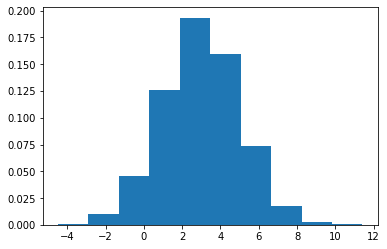

In [9]:
loc = 3 # mu
scale = 2 #sigma
samples = np.random.normal(loc, scale, size=10000)
plt.hist(samples, density=True)

Равномерный:

(array([0.20768691, 0.20268482, 0.20768691, 0.19328088, 0.1930808 ,
        0.19788281, 0.19288072, 0.20328507, 0.20088407, 0.20148432]),
 array([-2.99821923e+00, -2.49842847e+00, -1.99863771e+00, -1.49884695e+00,
        -9.99056192e-01, -4.99265434e-01,  5.25325155e-04,  5.00316084e-01,
         1.00010684e+00,  1.49989760e+00,  1.99968836e+00]),
 <a list of 10 Patch objects>)

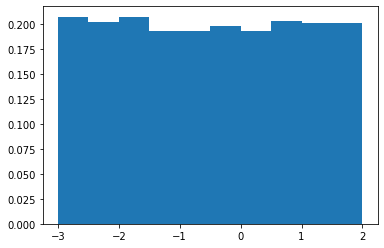

In [8]:
a = -3 
b = 2 
samples = np.random.uniform(a, b, size=10000)
plt.hist(samples, density=True)

Полный список распределений можно посмотреть тут: https://numpy.org/doc/1.16/reference/routines.random.html

**Построение теоритической функции распределения F(x) для заданного закона распределения. Используем функцию cdf()**

Нормальный:

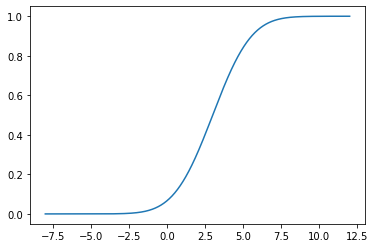

In [24]:
loc = 3 # mu
scale = 2 #sigma
ox = np.linspace(-8, 12, 1000)
oy = stats.norm.cdf(ox, loc, scale)
plt.plot(ox, oy)

Равномерный:

В данной функции параметр b - это не верхняя граница промежутка, а длина отрезка, то есть если a = 4, b = 6, отрезок будет [4, 4 + 6] -> [4, 10]

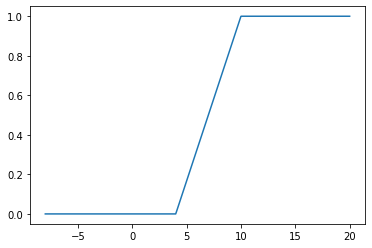

In [22]:
a = 4
b = 6
ox = np.linspace(-8, 20, 1000)
oy = stats.uniform.cdf(ox, a, b)
plt.plot(ox, oy)

Полный список распределений можно посмотреть тут: https://docs.scipy.org/doc/scipy/reference/stats.html

Если необхожимо найти фукнцию распределения от конкретного числа: F(10) = P(X < 10), также используем функцию cdf(). Например, для нормального закона распределения: 

In [25]:
mu = 6
sigma = 1
stats.norm.cdf(10, loc = mu, scale = sigma)

0.9999683287581669

**Построение функции плотности f(x) для заданного закона распределения. Используем функцию pdf()**

Нормальный:

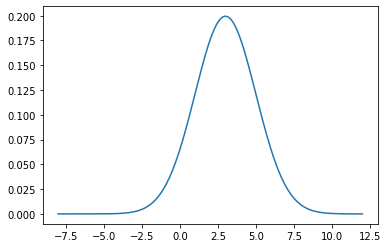

In [27]:
loc = 3 # mu
scale = 2 #sigma
ox = np.linspace(-8, 12, 1000)
oy = stats.norm.pdf(ox, loc, scale)
plt.plot(ox, oy)

Равномерный:

В данной функции параметр b - это не верхняя граница промежутка, а длина отрезка, то есть если a = 4, b = 6, отрезок будет [4, 4 + 6] -> [4, 10]

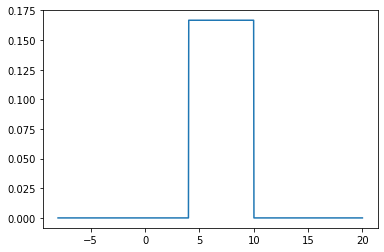

In [28]:
a = 4
b = 6
ox = np.linspace(-8, 20, 1000)
oy = stats.uniform.pdf(ox, a, b)
plt.plot(ox, oy)